In [116]:
import evolving_SBM_generate
import matplotlib.pyplot as plt
import numpy as np
import pickle
from TemporalNetwork import ContTempNetwork

In [3]:
n_per_group = 100
n_groups = 4
t_start = 0
t_end = 200
basis_num_communities = 2
powers_num_communities = [2, 1]
list_p_within_community = [45/50] * len(powers_num_communities)

In [59]:
net_heat0 = evolving_SBM_generate.generate_evolving_SBM(inter_tau = 5, activ_tau = 0.005,
                          n_per_group = n_per_group, n_groups = n_groups,
                          t_start = t_start, t_end = t_end,
                          basis_num_communities = basis_num_communities, powers_num_communities = powers_num_communities, list_p_within_community = list_p_within_community)

PID  1169891  :  merged  1150  events
PID  1169891  :  merged  0  events


In [60]:
net_heat0.compute_laplacian_matrices(save_adjacencies=True)

In [61]:
number_active_events = []
for i,t in enumerate(net_heat0.times[:-1]):
    number_active_events.append(np.sum(net_heat0.adjacencies[i].toarray()) / 2)

In [62]:
number_active_events_group1 = []
for i,t in enumerate(net_heat0.times[:-1]):
    number_active_events_group1.append(np.sum(net_heat0.adjacencies[i].toarray()[0:n_per_group,0:n_per_group]) / 2 + np.sum(net_heat0.adjacencies[i].toarray()[0:n_per_group,n_per_group:]))

In [63]:
activity_nodes_group1 = []
for i,t in enumerate(net_heat0.times[:-1]):
    activity_nodes_group1.append(np.sum(net_heat0.adjacencies[i].toarray()[0:n_per_group,:]))

In [64]:
number_active_events_groups12 = []
for i,t in enumerate(net_heat0.times[:-1]):
    number_active_events_groups12.append(np.sum(net_heat0.adjacencies[i].toarray()[0:n_per_group,n_per_group:2*n_per_group]))

In [65]:
number_active_events_groups13 = []
for i,t in enumerate(net_heat0.times[:-1]):
    number_active_events_groups13.append(np.sum(net_heat0.adjacencies[i].toarray()[0:n_per_group,2*n_per_group:3*n_per_group]))

In [66]:
number_active_events_groups11 = []
for i,t in enumerate(net_heat0.times[:-1]):
    number_active_events_groups11.append(np.sum(net_heat0.adjacencies[i].toarray()[0:n_per_group,0:n_per_group]) / 2)

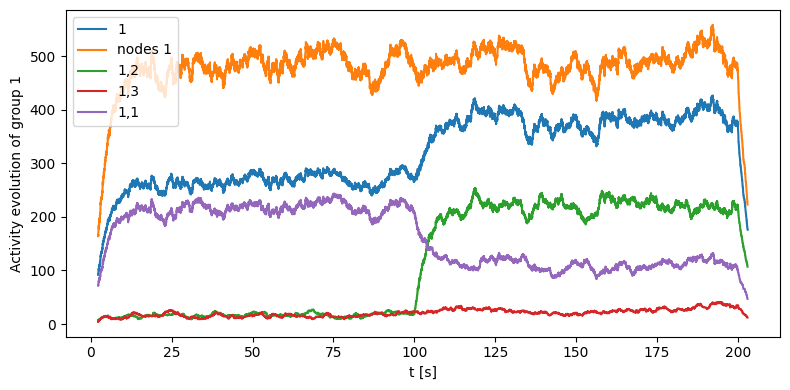

In [67]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

#ax.plot(net_heat0.times[:-1], number_active_events)
ax.plot(net_heat0.times[500:-501], number_active_events_group1[500:-500], label='1')
ax.plot(net_heat0.times[500:-501], activity_nodes_group1[500:-500], label='nodes 1')
ax.plot(net_heat0.times[500:-501], number_active_events_groups12[500:-500], label='1,2')
ax.plot(net_heat0.times[500:-501], number_active_events_groups13[500:-500], label='1,3')
ax.plot(net_heat0.times[500:-501], number_active_events_groups11[500:-500], label='1,1')

ax.set_xlabel("t [s]")
ax.set_ylabel("Activity evolution of group 1")

plt.legend()
plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_activity_function.png', format='png', dpi=300, bbox_inches='tight')

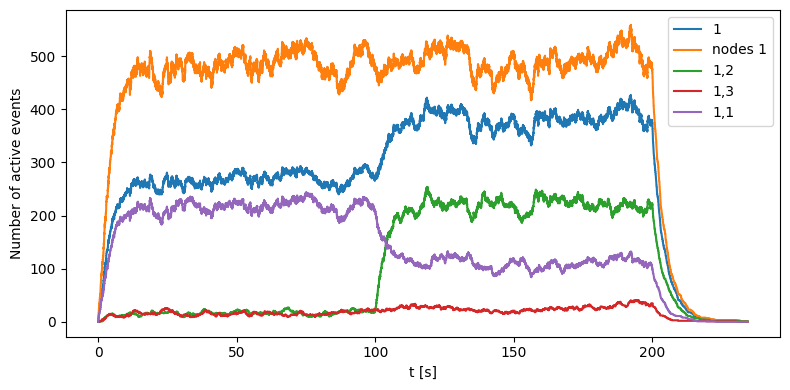

In [68]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

#ax.plot(net_heat0.times[:-1], number_active_events)
ax.plot(net_heat0.times[:-1], number_active_events_group1, label='1')
ax.plot(net_heat0.times[:-1], activity_nodes_group1, label='nodes 1')
ax.plot(net_heat0.times[:-1], number_active_events_groups12, label='1,2')
ax.plot(net_heat0.times[:-1], number_active_events_groups13, label='1,3')
ax.plot(net_heat0.times[:-1], number_active_events_groups11, label='1,1')

ax.set_xlabel("t [s]")
ax.set_ylabel("Number of active events")

plt.legend()
plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_activity_function.png', format='png', dpi=300, bbox_inches='tight')

In [69]:
number_active_events_groups14 = []
for i,t in enumerate(net_heat0.times[:-1]):
    number_active_events_groups14.append(np.sum(net_heat0.adjacencies[i].toarray()[0:n_per_group,3*n_per_group:4*n_per_group]))

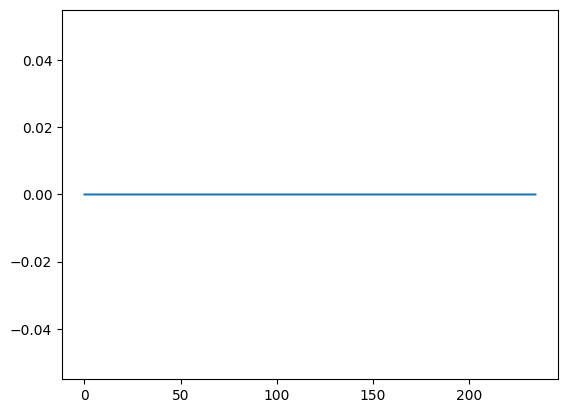

In [70]:
plt.plot(net_heat0.times[:-1], np.array(number_active_events_group1) - (np.array(number_active_events_groups11) + np.array(number_active_events_groups12) + np.array(number_active_events_groups13) + np.array(number_active_events_groups14)), label='error')

In [71]:
switch = (t_end - t_start) / 2
matrix1_0 = net_heat0.compute_static_adjacency_matrix(start_time=t_start, end_time=switch).toarray()
matrix2_0 = net_heat0.compute_static_adjacency_matrix(start_time=switch, end_time=t_end).toarray()

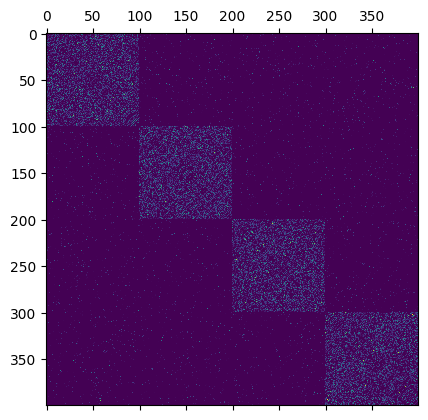

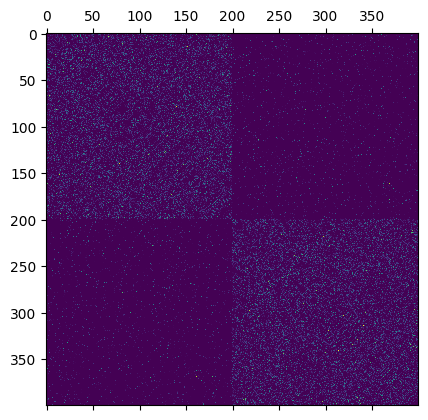

In [72]:
plt.matshow(matrix1_0)
plt.matshow(matrix2_0)

## Constructing Equivalent SBM

In [73]:
np.array(number_active_events_groups11) * (1 / (n_per_group * (n_per_group-1)))

array([0.        , 0.00010101, 0.00010101, ..., 0.        , 0.        ,
       0.        ])

In [124]:
p_within = np.where((net_heat0.times < 100)[:-1],  np.array(number_active_events_groups11) * (2 / (n_per_group * (n_per_group-1))), np.array(number_active_events_groups11) * (2 /(n_per_group * (n_per_group-1))))

In [93]:
number_active_events_group1outside_1 = np.array(number_active_events_group1) - np.array(number_active_events_groups11)
number_active_events_group1outside_2 = np.array(number_active_events_groups13) + np.array(number_active_events_groups14)

p_outside = np.where((net_heat0.times < 100)[:-1],  number_active_events_group1outside_1 * (1 / (n_per_group * (3*n_per_group))), number_active_events_group1outside_2 * (1 / (n_per_group * (2*n_per_group))))

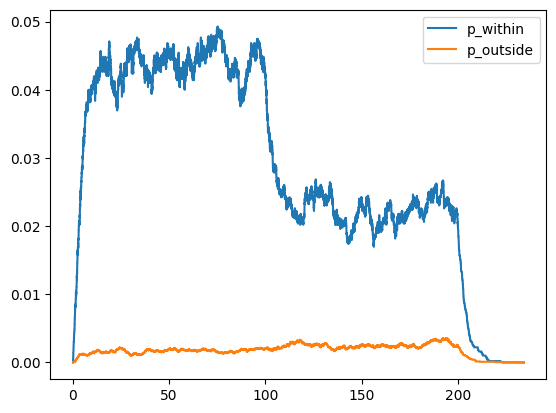

In [125]:
plt.plot(net_heat0.times[:-1], p_within, label='p_within')
plt.plot(net_heat0.times[:-1], p_outside, label='p_outside')
plt.legend()

In [126]:
flag_25 = np.argmax(net_heat0.times > 25)
flag_75 = np.argmax(net_heat0.times > 75)
flag_125 = np.argmax(net_heat0.times > 125)
flag_175 = np.argmax(net_heat0.times > 175)

In [127]:
p_within_1 = np.mean(p_within[flag_25: flag_75])
p_within_2 = np.mean(p_within[flag_125: flag_175])

p_outside_1 = np.mean(p_outside[flag_25: flag_75])
p_outside_2 = np.mean(p_outside[flag_125: flag_175])

In [128]:
print(p_within_1, p_within_2, p_outside_1, p_outside_2)

0.04421020281755291 0.02168235690919138 0.0016868210570338228 0.0023608368009743227


In [129]:
# Generate dynamic network sequence with one change point of type merge
%run /home/b/skoove/compute/entropy/flow_stability/benchmark_merge.py --sizes_1 100 100 100 100 --sizes_2 200 200 --p 0.0442 --q 0.0017 --n_samples 4000 --sequence

 Change point at t = 2486


In [130]:
# Load training data
training_data_path = '/home/b/skoove/compute/entropy/flow_stability/04_08_13:51:38_merge_T_4000_n_400_k1_4_k2_2_p_0.0442_q_0.0017_0/'
with open(training_data_path + 'data.p', 'rb') as f:
    training_data = pickle.load(f)

/home/b/skoove/compute/entropy/S_env/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [131]:
source_nodes = []
target_nodes = []
starting_times = []
ending_times = []

for i in range(1000):
    for j in range(training_data[i].edges()[0].shape[0]):
        source_nodes.append(int(training_data[i].edges()[0][j]))
        target_nodes.append(int(training_data[i].edges()[1][j]))
        starting_times.append(i)
        ending_times.append(i+1)

In [132]:
dynamic_SBM = ContTempNetwork(source_nodes=source_nodes,
                       target_nodes=target_nodes,
                       starting_times=starting_times,
                       ending_times=ending_times,
                       merge_overlapping_events=True)

PID  1169891  :  merged  978746  events
PID  1169891  :  merged  0  events


In [ ]:
dynamic_SBM.compute_laplacian_matrices(save_adjacencies=True, random_walk = False)

In [147]:
dynamic_SBM_number_active_events_group1 = []
for i,t in enumerate(dynamic_SBM.times[:1000]):
    dynamic_SBM_number_active_events_group1.append(np.sum(dynamic_SBM.adjacencies[i].toarray()[0:n_per_group,0:n_per_group]) / 2 + np.sum(net_heat0.adjacencies[i].toarray()[0:n_per_group,n_per_group:]))

dynamic_SBM_activity_nodes_group1 = []
for i,t in enumerate(dynamic_SBM.times[:1000]):
    dynamic_SBM_activity_nodes_group1.append(np.sum(dynamic_SBM.adjacencies[i].toarray()[0:n_per_group,:]))

dynamic_SBM_number_active_events_groups12 = []
for i,t in enumerate(dynamic_SBM.times[:1000]):
    dynamic_SBM_number_active_events_groups12.append(np.sum(dynamic_SBM.adjacencies[i].toarray()[0:n_per_group,n_per_group:2*n_per_group]))

dynamic_SBM_number_active_events_groups13 = []
for i,t in enumerate(dynamic_SBM.times[:1000]):
    dynamic_SBM_number_active_events_groups13.append(np.sum(dynamic_SBM.adjacencies[i].toarray()[0:n_per_group,2*n_per_group:3*n_per_group]))

dynamic_SBM_number_active_events_groups11 = []
for i,t in enumerate(dynamic_SBM.times[:1000]):
    dynamic_SBM_number_active_events_groups11.append(np.sum(dynamic_SBM.adjacencies[i].toarray()[0:n_per_group,0:n_per_group]) / 2)

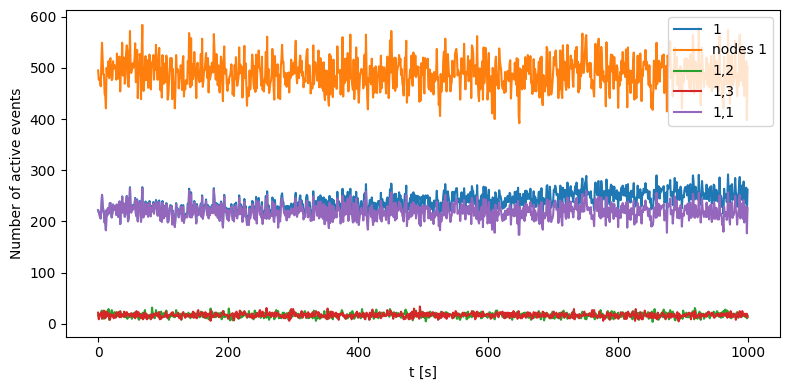

In [148]:
fig, ax = plt.subplots(1,1, figsize = (8, 4))

#ax.plot(net_heat0.times[:-1], number_active_events)
ax.plot(dynamic_SBM.times[:1000], dynamic_SBM_number_active_events_group1, label='1')
ax.plot(dynamic_SBM.times[:1000], dynamic_SBM_activity_nodes_group1, label='nodes 1')
ax.plot(dynamic_SBM.times[:1000], dynamic_SBM_number_active_events_groups12, label='1,2')
ax.plot(dynamic_SBM.times[:1000], dynamic_SBM_number_active_events_groups13, label='1,3')
ax.plot(dynamic_SBM.times[:1000], dynamic_SBM_number_active_events_groups11, label='1,1')

ax.set_xlabel("t [s]")
ax.set_ylabel("Number of active events")

plt.legend()
plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_activity_function.png', format='png', dpi=300, bbox_inches='tight')

## Second Phase

In [140]:
# Generate dynamic network sequence with one change point of type merge
%run /home/b/skoove/compute/entropy/flow_stability/benchmark_merge.py --sizes_1 100 100 100 100 --sizes_2 200 200 --p 0.0217 --q 0.0024 --n_samples 4000 --sequence

 Change point at t = 2447


In [141]:
# Load training data
training_data_path = '/home/b/skoove/compute/entropy/flow_stability/04_08_16:35:22_merge_T_4000_n_400_k1_4_k2_2_p_0.0217_q_0.0024_0/'
with open(training_data_path + 'data.p', 'rb') as f:
    training_data = pickle.load(f)

/home/b/skoove/compute/entropy/S_env/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [142]:
source_nodes_2 = []
target_nodes_2 = []
starting_times_2 = []
ending_times_2 = []

for i in range(3000,4000):
    for j in range(training_data[i].edges()[0].shape[0]):
        source_nodes_2.append(int(training_data[i].edges()[0][j]))
        target_nodes_2.append(int(training_data[i].edges()[1][j]))
        starting_times_2.append(i-1000)
        ending_times_2.append(i-1000+1)

In [144]:
dynamic_SBM_2 = ContTempNetwork(source_nodes=source_nodes_2,
                       target_nodes=target_nodes_2,
                       starting_times=starting_times_2,
                       ending_times=ending_times_2,
                       merge_overlapping_events=True)

PID  1169891  :  merged  958659  events
PID  1169891  :  merged  0  events


In [145]:
dynamic_SBM_2.compute_laplacian_matrices(save_adjacencies=True, random_walk = False)

In [166]:
dynamic_SBM_2_number_active_events_group1 = []
for i,t in enumerate(dynamic_SBM_2.times[:1000]):
    dynamic_SBM_2_number_active_events_group1.append(np.sum(dynamic_SBM_2.adjacencies[i].toarray()[0:n_per_group,0:n_per_group]) / 2 + np.sum(dynamic_SBM_2.adjacencies[i].toarray()[0:n_per_group,n_per_group:]))

dynamic_SBM_2_activity_nodes_group1 = []
for i,t in enumerate(dynamic_SBM_2.times[:1000]):
    dynamic_SBM_2_activity_nodes_group1.append(np.sum(dynamic_SBM_2.adjacencies[i].toarray()[0:n_per_group,:]))

dynamic_SBM_2_number_active_events_groups12 = []
for i,t in enumerate(dynamic_SBM_2.times[:1000]):
    dynamic_SBM_2_number_active_events_groups12.append(np.sum(dynamic_SBM_2.adjacencies[i].toarray()[0:n_per_group,n_per_group:2*n_per_group]))

dynamic_SBM_2_number_active_events_groups13 = []
for i,t in enumerate(dynamic_SBM_2.times[:1000]):
    dynamic_SBM_2_number_active_events_groups13.append(np.sum(dynamic_SBM_2.adjacencies[i].toarray()[0:n_per_group,2*n_per_group:3*n_per_group]))

dynamic_SBM_2_number_active_events_groups11 = []
for i,t in enumerate(dynamic_SBM_2.times[:1000]):
    dynamic_SBM_2_number_active_events_groups11.append(np.sum(dynamic_SBM_2.adjacencies[i].toarray()[0:n_per_group,0:n_per_group]) / 2)

### Comparison

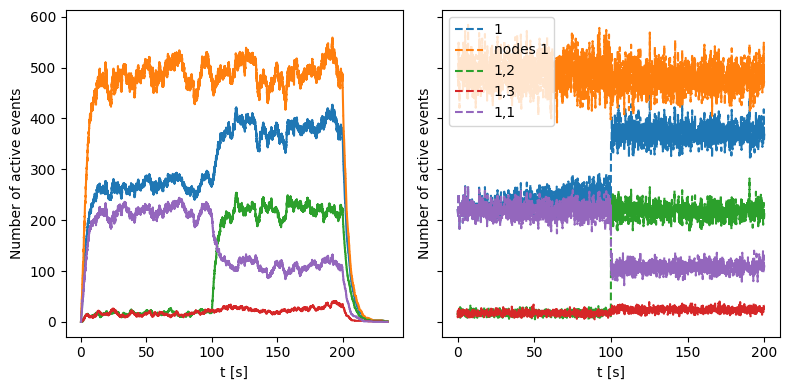

In [167]:
fig, axs = plt.subplots(1,2, figsize = (8, 4), sharey=True)

ax = axs[0]
ax.plot(net_heat0.times[:-1], number_active_events_group1, label='1')
ax.plot(net_heat0.times[:-1], activity_nodes_group1, label='nodes 1')
ax.plot(net_heat0.times[:-1], number_active_events_groups12, label='1,2')
ax.plot(net_heat0.times[:-1], number_active_events_groups13, label='1,3')
ax.plot(net_heat0.times[:-1], number_active_events_groups11, label='1,1')
ax.set_xlabel("t [s]")
ax.set_ylabel("Number of active events")

ax = axs[1]
ax.plot(np.arange(0,200,0.1), dynamic_SBM_number_active_events_group1 + dynamic_SBM_2_number_active_events_group1, '--', label='1')
ax.plot(np.arange(0,200,0.1), dynamic_SBM_activity_nodes_group1 + dynamic_SBM_2_activity_nodes_group1, '--', label='nodes 1')
ax.plot(np.arange(0,200,0.1), dynamic_SBM_number_active_events_groups12 + dynamic_SBM_2_number_active_events_groups12, '--', label='1,2')
ax.plot(np.arange(0,200,0.1), dynamic_SBM_number_active_events_groups13 + dynamic_SBM_2_number_active_events_groups13, '--', label='1,3')
ax.plot(np.arange(0,200,0.1), dynamic_SBM_number_active_events_groups11 + dynamic_SBM_2_number_active_events_groups11, '--', label='1,1')

ax.set_xlabel("t [s]")
ax.set_ylabel("Number of active events")

plt.legend()
plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_activity_function.png', format='png', dpi=300, bbox_inches='tight')